In [1]:
import pandas

In [2]:
data = pandas.read_csv('../data/201508_trip_data.csv.gz')

In [159]:
d1 = pandas.read_csv('../data/oslobike/trips-2016.10.1-2016.10.31.csv.zip')
d2 = pandas.read_csv('../data/oslobike/trips-2016.11.1-2016.11.30.csv.zip')

In [172]:
delta = parse('2016-10-01 06:02:16') - parse('2016-10-01 06:00:08')

In [173]:
delta.total_seconds()

128.0

In [161]:
d1['Start time'].apply(lambda x: x[:-6])

0         2016-10-01 06:00:08
1         2016-10-01 06:00:41
2         2016-10-01 06:01:02
3         2016-10-01 06:01:20
4         2016-10-01 06:02:16
5         2016-10-01 06:04:22
6         2016-10-01 06:04:39
7         2016-10-01 06:05:54
8         2016-10-01 06:06:01
9         2016-10-01 06:06:13
10        2016-10-01 06:06:16
11        2016-10-01 06:06:36
12        2016-10-01 06:08:01
13        2016-10-01 06:08:22
14        2016-10-01 06:11:44
15        2016-10-01 06:12:00
16        2016-10-01 06:13:26
17        2016-10-01 06:15:22
18        2016-10-01 06:15:34
19        2016-10-01 06:17:36
20        2016-10-01 06:18:04
21        2016-10-01 06:18:43
22        2016-10-01 06:21:49
23        2016-10-01 06:22:04
24        2016-10-01 06:22:17
25        2016-10-01 06:24:50
26        2016-10-01 06:26:13
27        2016-10-01 06:26:55
28        2016-10-01 06:27:06
29        2016-10-01 06:29:20
                 ...         
242728    2016-10-31 23:33:37
242729    2016-10-31 23:33:55
242730    

In [3]:
data.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [5]:
%matplotlib inline

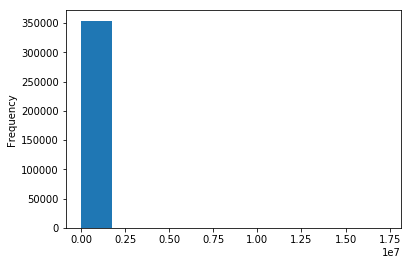

In [6]:
data.Duration.plot.hist()

In [7]:
data['z_duration'] = (data.Duration - data.Duration.mean()) / data.Duration.std()

In [9]:
import matplotlib.pyplot as plt

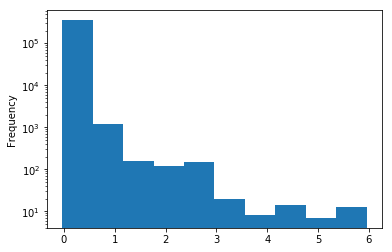

In [10]:
data.z_duration[data.z_duration < 6].plot.hist()
plt.yscale('log')

In [11]:
median_dev = data.Duration - data.Duration.median()

In [12]:
data['z_median'] = median_dev / (median_dev**2).median()

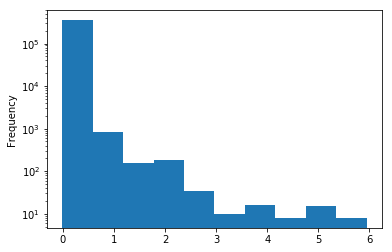

In [13]:
data.z_median[data.z_median < 6].plot.hist()
plt.yscale('log')

In [14]:
?pandas.read_csv

In [15]:
from datetime import datetime

In [16]:
def mdy_hm(date_string):
    return datetime.strptime(date_string, '%m/%d/%Y %H:%M')

In [17]:
data['Start Date'] = data['Start Date'].apply(mdy_hm)

In [18]:
from dateutil.parser import parse

In [22]:
parse('2017-12-30 12:34')

datetime.datetime(2017, 12, 30, 12, 34)

In [23]:
parse('2017/12/30 12:34:21') # slow!

datetime.datetime(2017, 12, 30, 12, 34, 21)

In [24]:
parse('2017/12/30 12:34:21').date()

datetime.date(2017, 12, 30)

In [25]:
parse('2017/12/30 12:34:21').hour

12

In [26]:
data['date'] = data['Start Date'].apply(lambda x: x.date())
data['hour'] = data['Start Date'].apply(lambda x: x.hour)

## Aside: Lambdas

In [27]:
def square(x):
    return x**2

In [29]:
square(2)

4

In [30]:
def power(x, y):
    return x**y

In [31]:
power(2, 4)

16

In [32]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
map(square, [1,2,3,4])

[1, 4, 9, 16]

In [46]:
map(lambda x: x**2, [1,2,3,4])

[1, 4, 9, 16]

In [47]:
(lambda x: x**2)(23)

529

In [48]:
(lambda x,y: x**y)(2, 4)

16

In [49]:
map(square, 'abc')

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [50]:
map(lambda x: x**2, 'abc')

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

## Back to business

In [51]:
counts = data.groupby(['date', 'hour'], as_index=False).size()

In [52]:
animals = pandas.DataFrame({'weight': [1, 2, 0.1, 15],
                            'length': [50, 70, 8, 60],
                            'type': ['fish', 'fish', 'mammal', 'mammal']},
                           index=['trout', 'cod', 'hamster', 'dog'])

In [57]:
animals

,length,type,weight
trout,50,fish,1.0
cod,70,fish,2.0
hamster,8,mammal,0.1
dog,60,mammal,15.0


In [58]:
animals.length['trout']

50

In [59]:
animals.groupby('type').mean()

,length,weight
type,,
fish,60,1.50
mammal,34,7.55


In [60]:
animals.groupby('type').max()

,length,weight
type,,
fish,70,2.0
mammal,60,15.0


In [61]:
animals.groupby('type').size()

type
fish      2
mammal    2
dtype: int64

In [62]:
animals.groupby('type', as_index=False).mean()

,type,length,weight
0,fish,60,1.50
1,mammal,34,7.55


In [63]:
counts.head()

date        hour
2014-09-01  0       3
            3       1
            4       2
            5       1
            6       1
dtype: int64

In [64]:
animals

,length,type,weight
trout,50,fish,1.0
cod,70,fish,2.0
hamster,8,mammal,0.1
dog,60,mammal,15.0


In [67]:
['size', 'weight']*2

['size', 'weight', 'size', 'weight']

In [65]:
strange_animals = pandas.DataFrame({'name': ['trout', 'trout', 'cod', 'cod'],
                                    'info_type': ['size', 'weight']*2,
                                    'value': [50, 1, 70, 2]})

In [66]:
strange_animals

,info_type,name,value
0,size,trout,50
1,weight,trout,1
2,size,cod,70
3,weight,cod,2


In [68]:
strange_animals.pivot_table(index='name', columns='info_type', values='value')

info_type,size,weight
name,,
cod,70,2
trout,50,1


In [87]:
animals.stack()

trout    length        50
         type        fish
         weight         1
cod      length        70
         type        fish
         weight         2
hamster  length         8
         type      mammal
         weight       0.1
dog      length        60
         type      mammal
         weight        15
dtype: object

In [89]:
stacked = animals.stack().reset_index()
stacked

,level_0,level_1,0
0,trout,length,50
1,trout,type,fish
2,trout,weight,1
3,cod,length,70
4,cod,type,fish
5,cod,weight,2
6,hamster,length,8
7,hamster,type,mammal
8,hamster,weight,0.1
9,dog,length,60


In [91]:
stacked.columns = ['animal', 'info', 'value']
stacked

,animal,info,value
0,trout,length,50
1,trout,type,fish
2,trout,weight,1
3,cod,length,70
4,cod,type,fish
5,cod,weight,2
6,hamster,length,8
7,hamster,type,mammal
8,hamster,weight,0.1
9,dog,length,60


In [70]:
counts.head()

date        hour
2014-09-01  0       3
            3       1
            4       2
            5       1
            6       1
dtype: int64

In [71]:
type(counts)

pandas.core.series.Series

In [73]:
counts.reset_index().head()

,date,hour,0
0,2014-09-01,0,3
1,2014-09-01,3,1
2,2014-09-01,4,2
3,2014-09-01,5,1
4,2014-09-01,6,1


In [74]:
counts.name = 'count' # get rid of the '0'

In [75]:
counts = counts.reset_index()
counts.head()

,date,hour,count
0,2014-09-01,0,3
1,2014-09-01,3,1
2,2014-09-01,4,2
3,2014-09-01,5,1
4,2014-09-01,6,1


In [79]:
features = counts.pivot_table(index='date', columns='hour', values='count').fillna(0)
features.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2014-09-01,3.0,0.0,0.0,1.0,2.0,1.0,1.0,4.0,13.0,16.0,...,49.0,28.0,23.0,25.0,7.0,19.0,12.0,9.0,4.0,0.0
2014-09-02,0.0,1.0,0.0,0.0,2.0,4.0,31.0,113.0,181.0,152.0,...,43.0,51.0,111.0,198.0,141.0,52.0,24.0,12.0,9.0,9.0
2014-09-03,0.0,1.0,1.0,1.0,1.0,9.0,34.0,124.0,218.0,139.0,...,46.0,47.0,107.0,209.0,151.0,69.0,22.0,17.0,13.0,7.0
2014-09-04,2.0,0.0,0.0,0.0,3.0,7.0,37.0,107.0,195.0,125.0,...,47.0,56.0,122.0,191.0,125.0,51.0,29.0,23.0,19.0,6.0
2014-09-05,2.0,2.0,0.0,2.0,2.0,7.0,25.0,104.0,190.0,123.0,...,41.0,52.0,119.0,164.0,110.0,37.0,29.0,9.0,13.0,9.0


## Elbow method

In [81]:
from sklearn.cluster import KMeans

In [82]:
ks = range(2, 10)

In [83]:
?KMeans

In [84]:
scores = [-KMeans(k).fit(features).score(features) for k in ks]

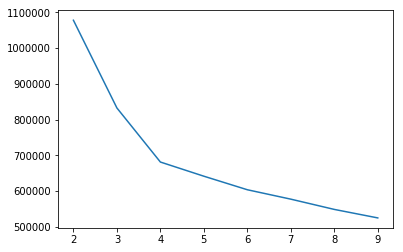

In [85]:
plt.plot(ks, scores)

In [92]:
model = KMeans(4).fit(features)

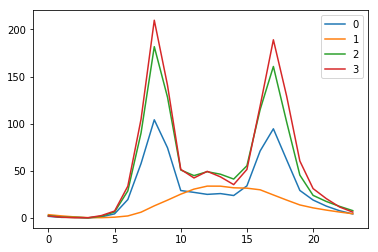

In [93]:
for n, center in enumerate(model.cluster_centers_):
    plt.plot(center, label=str(n))
plt.legend()

In [94]:
labels = pandas.DataFrame({'date': features.index, 'cluster': model.labels_})

In [95]:
labels.head()

,cluster,date
0,1,2014-09-01
1,3,2014-09-02
2,3,2014-09-03
3,3,2014-09-04
4,2,2014-09-05


In [98]:
from calendar import day_abbr, month_abbr

In [99]:
day_abbr[0]

'Mon'

In [100]:
labels['day'] = labels.date.apply(lambda x: day_abbr[x.weekday()])
labels['month'] = labels.date.apply(lambda x: month_abbr[x.month])

In [101]:
labels.head()

,cluster,date,day,month
0,1,2014-09-01,Mon,Sep
1,3,2014-09-02,Tue,Sep
2,3,2014-09-03,Wed,Sep
3,3,2014-09-04,Thu,Sep
4,2,2014-09-05,Fri,Sep


In [102]:
labels.groupby(['cluster', 'day']).size()

cluster  day
0        Fri     4
         Mon     4
         Thu     1
         Tue     4
         Wed     5
1        Fri     4
         Mon     3
         Sat    52
         Sun    52
         Thu     4
         Wed     2
2        Fri    44
         Mon     7
         Thu    15
         Tue     6
         Wed     6
3        Mon    39
         Thu    32
         Tue    42
         Wed    39
dtype: int64

In [103]:
weekday_counts = labels.groupby(['cluster', 'day']).size()
weekday_counts.name = 'count'

In [107]:
weekday_for_plotting = (weekday_counts
                        .reset_index()
                        .pivot_table(columns='day', values='count', index='cluster'))

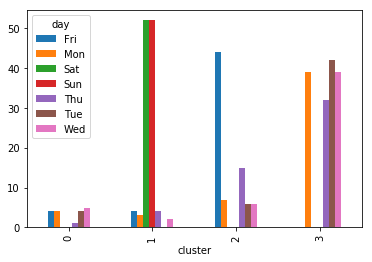

In [108]:
weekday_for_plotting.plot.bar()

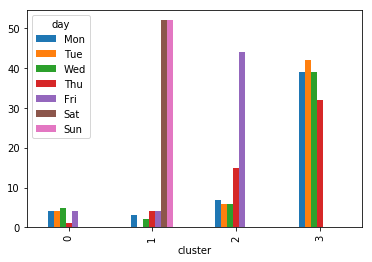

In [175]:
weekday_for_plotting[[day_abbr[i] for i in range(7)]].plot.bar()

In [111]:
per_month = labels.groupby(['month', 'cluster']).size()
per_month.name = 'count'
per_month = per_month.reset_index()
per_month.head()

,month,cluster,count
0,Apr,1,8
1,Apr,2,5
2,Apr,3,17
3,Aug,1,10
4,Aug,2,4


In [112]:
month_for_plotting = per_month.pivot_table(index='cluster', values='count', columns='month')

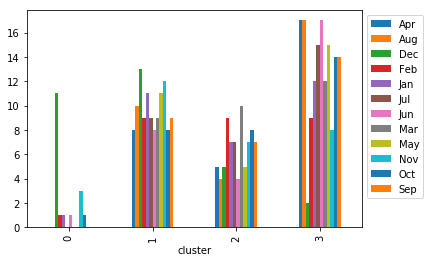

In [114]:
month_for_plotting.plot.bar()
plt.legend(bbox_to_anchor=(1,1))

In [115]:
hours = features.columns

In [116]:
hours

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name=u'hour')

In [118]:
features['centers'] = [model.cluster_centers_[x] for x in model.labels_]

In [119]:
features['labels'] = model.labels_

In [120]:
from numpy.linalg import norm

In [122]:
features['dist'] = [norm(i - j) for i, j in zip(features[hours].values,
                                                features.centers)]

In [123]:
names = ['a', 'b', 'c']
values = [12, 24, 65]

In [124]:
for name, value in zip(names, values):
    print name, value

a 12
b 24
c 65


In [126]:
for i, name in enumerate(names):
    print i, name

0 a
1 b
2 c


In [128]:
import numpy as np

In [129]:
stats = features.groupby('labels')['dist'].agg([np.mean, np.std])

In [130]:
stats

,mean,std
labels,,
0,75.040305,17.617176
1,33.481062,12.180384
2,45.192794,12.459722
3,39.861972,9.411020


In [131]:
features.head()

hour,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,centers,labels,dist
date,,,,,,,,,,,,,,,,,,,,,
2014-09-01,3.0,0.0,0.0,1.0,2.0,1.0,1.0,4.0,13.0,16.0,...,25.0,7.0,19.0,12.0,9.0,4.0,0.0,"[3.67521367521, 2.34188034188, 1.2735042735, 0...",1,35.508540
2014-09-02,0.0,1.0,0.0,0.0,2.0,4.0,31.0,113.0,181.0,152.0,...,198.0,141.0,52.0,24.0,12.0,9.0,9.0,"[2.25, 0.927631578947, 0.394736842105, 0.40789...",3,40.089035
2014-09-03,0.0,1.0,1.0,1.0,1.0,9.0,34.0,124.0,218.0,139.0,...,209.0,151.0,69.0,22.0,17.0,13.0,7.0,"[2.25, 0.927631578947, 0.394736842105, 0.40789...",3,45.163582
2014-09-04,2.0,0.0,0.0,0.0,3.0,7.0,37.0,107.0,195.0,125.0,...,191.0,125.0,51.0,29.0,23.0,19.0,6.0,"[2.25, 0.927631578947, 0.394736842105, 0.40789...",3,45.691894
2014-09-05,2.0,2.0,0.0,2.0,2.0,7.0,25.0,104.0,190.0,123.0,...,164.0,110.0,37.0,29.0,9.0,13.0,9.0,"[2.66666666667, 1.05128205128, 0.666666666667,...",2,31.936204


In [133]:
joined = features.join(stats, on='labels')

In [134]:
joined.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,centers,labels,dist,mean,std
date,,,,,,,,,,,,,,,,,,,,,
2014-09-01,3.0,0.0,0.0,1.0,2.0,1.0,1.0,4.0,13.0,16.0,...,19.0,12.0,9.0,4.0,0.0,"[3.67521367521, 2.34188034188, 1.2735042735, 0...",1,35.508540,33.481062,12.180384
2014-09-02,0.0,1.0,0.0,0.0,2.0,4.0,31.0,113.0,181.0,152.0,...,52.0,24.0,12.0,9.0,9.0,"[2.25, 0.927631578947, 0.394736842105, 0.40789...",3,40.089035,39.861972,9.411020
2014-09-03,0.0,1.0,1.0,1.0,1.0,9.0,34.0,124.0,218.0,139.0,...,69.0,22.0,17.0,13.0,7.0,"[2.25, 0.927631578947, 0.394736842105, 0.40789...",3,45.163582,39.861972,9.411020
2014-09-04,2.0,0.0,0.0,0.0,3.0,7.0,37.0,107.0,195.0,125.0,...,51.0,29.0,23.0,19.0,6.0,"[2.25, 0.927631578947, 0.394736842105, 0.40789...",3,45.691894,39.861972,9.411020
2014-09-05,2.0,2.0,0.0,2.0,2.0,7.0,25.0,104.0,190.0,123.0,...,37.0,29.0,9.0,13.0,9.0,"[2.66666666667, 1.05128205128, 0.666666666667,...",2,31.936204,45.192794,12.459722


In [136]:
joined['z'] = (joined.dist - joined['mean']) / joined['std']

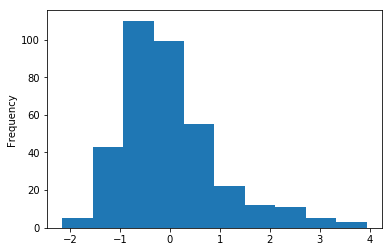

In [137]:
joined.z.plot.hist()

In [138]:
joined[joined.z > 3]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,centers,labels,dist,mean,std,z
date,,,,,,,,,,,,,,,,,,,,,
2014-09-25,2.0,1.0,1.0,1.0,0.0,0.0,18.0,60.0,122.0,145.0,...,40.0,26.0,22.0,12.0,"[2.66666666667, 1.05128205128, 0.666666666667,...",2,84.129010,45.192794,12.459722,3.124967
2014-10-20,2.0,0.0,2.0,0.0,1.0,4.0,38.0,108.0,241.0,77.0,...,31.0,13.0,3.0,6.0,"[2.25, 0.927631578947, 0.394736842105, 0.40789...",3,76.658070,39.861972,9.411020,3.909895
2014-12-11,1.0,2.0,0.0,1.0,1.0,0.0,6.0,11.0,15.0,9.0,...,6.0,2.0,2.0,2.0,"[3.67521367521, 2.34188034188, 1.2735042735, 0...",1,76.780584,33.481062,12.180384,3.554857
2015-03-09,0.0,0.0,0.0,0.0,3.0,5.0,24.0,52.0,141.0,115.0,...,33.0,22.0,17.0,6.0,"[2.66666666667, 1.05128205128, 0.666666666667,...",2,85.537355,45.192794,12.459722,3.237998
2015-06-01,0.0,0.0,1.0,0.0,4.0,6.0,26.0,70.0,155.0,132.0,...,27.0,21.0,18.0,3.0,"[2.25, 0.927631578947, 0.394736842105, 0.40789...",3,76.915960,39.861972,9.411020,3.937298


In [150]:
animals

,length,type,weight
trout,50,fish,1.0
cod,70,fish,2.0
hamster,8,mammal,0.1
dog,60,mammal,15.0


In [153]:
animals.weight

trout       1.0
cod         2.0
hamster     0.1
dog        15.0
Name: weight, dtype: float64

In [154]:
animals['weight']

trout       1.0
cod         2.0
hamster     0.1
dog        15.0
Name: weight, dtype: float64

In [152]:
animals[(animals.weight > 1) & (animals.type == 'fish')]

,length,type,weight
cod,70,fish,2.0


In [157]:
animals.std()

length    27.251911
weight     7.026320
dtype: float64

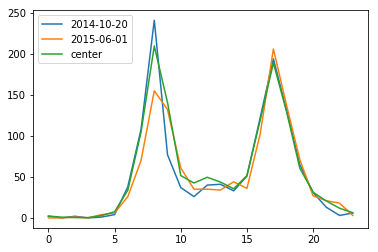

In [164]:
for row in joined[(joined.z > 3) & (joined['labels'] == 3)][list(hours)].iterrows():
    plt.plot(row[1])
plt.plot(model.cluster_centers_[3], label='center')
plt.legend()

In [166]:
day_abbr[parse('2015-06-01').weekday()]

'Mon'

In [168]:
day_abbr[parse('2014-10-20').weekday()]

'Mon'

## One hot encoding

In [182]:
labels.day.head()

0    Mon
1    Tue
2    Wed
3    Thu
4    Fri
Name: day, dtype: object

In [183]:
pandas.get_dummies(labels.day).head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [196]:
import json

In [198]:
station_json = json.load(open('../data/bysykkel_stations.json'))

In [199]:
station_json.keys()

[u'stations']

In [200]:
s = json.dumps(station_json['stations'])

In [202]:
pandas.read_json(s)

,bounds,center,id,in_service,number_of_locks,subtitle,title
0,"[{u'latitude': 59.9154186022, u'longitude': 10...","{u'latitude': 59.91562, u'longitude': 10.762248}",157,True,30,mellom Norbygata og Urtegata,Nylandsveien
1,"[{u'latitude': 59.9391401685, u'longitude': 10...","{u'latitude': 59.939228, u'longitude': 10.75917}",158,True,24,rett over busstoppet,Bentsebrugata
2,"[{u'latitude': 59.9391518606, u'longitude': 10...","{u'latitude': 59.939238, u'longitude': 10.774279}",159,True,21,Mellom Åsengata og Nordkappgata,Hans Nielsen Hauges plass
3,"[{u'latitude': 59.9101839259, u'longitude': 10...","{u'latitude': 59.910215, u'longitude': 10.751687}",160,True,25,nærmest fontenen,Sjøsiden vest
4,"[{u'latitude': 59.9267811685, u'longitude': 10...","{u'latitude': 59.926872, u'longitude': 10.738456}",161,True,20,ved busstoppet Colletts gate,St. Hanshaugen park vest
5,"[{u'latitude': 59.934793031, u'longitude': 10....","{u'latitude': 59.934934, u'longitude': 10.749475}",162,True,30,i Uelands gate,Arkitekt Rivertz Plass
6,"[{u'latitude': 59.9133640935, u'longitude': 10...","{u'latitude': 59.913409, u'longitude': 10.75737}",163,True,42,langs Brugata,Vaterlandsparken
7,"[{u'latitude': 59.919378013, u'longitude': 10....","{u'latitude': 59.91953, u'longitude': 10.743836}",164,True,18,langs Ullevålsveien,Vår Frelsers gravlund sør
8,"[{u'latitude': 59.9436861014, u'longitude': 10...","{u'latitude': 59.94375, u'longitude': 10.760216}",166,True,21,ved rundkjøringen,Bjølsen Studentby
9,"[{u'latitude': 59.9206040574, u'longitude': 10...","{u'latitude': 59.920565, u'longitude': 10.734274}",167,True,18,ved Stensberggata,Pilestredet Park Studenthus


## Predictive Modeling

In [205]:
hourly = (data
          .groupby('Start Date')
          .size()
          .resample('1h')
          .sum()
          .fillna(0))

In [206]:
hourly.name = 'count'

In [207]:
hourly.head()

Start Date
2014-09-01 00:00:00    3.0
2014-09-01 01:00:00    0.0
2014-09-01 02:00:00    0.0
2014-09-01 03:00:00    1.0
2014-09-01 04:00:00    2.0
Freq: H, Name: count, dtype: float64

In [208]:
shifts = {'1h': 1, '1d': 24, '1w': 7*24, '1m': 28*24}

In [211]:
hourly.shift(1).head()

Start Date
2014-09-01 00:00:00    NaN
2014-09-01 01:00:00    3.0
2014-09-01 02:00:00    0.0
2014-09-01 03:00:00    0.0
2014-09-01 04:00:00    1.0
Freq: H, Name: count, dtype: float64

In [212]:
data = pandas.DataFrame({key: hourly.shift(shifts[key]) for key in shifts})

In [213]:
data.head()

,1d,1h,1m,1w
Start Date,,,,
2014-09-01 00:00:00,NaN,NaN,NaN,NaN
2014-09-01 01:00:00,NaN,3.0,NaN,NaN
2014-09-01 02:00:00,NaN,0.0,NaN,NaN
2014-09-01 03:00:00,NaN,0.0,NaN,NaN
2014-09-01 04:00:00,NaN,1.0,NaN,NaN


In [214]:
data['current'] = hourly

In [215]:
data = data.dropna()

In [216]:
data.head()

,1d,1h,1m,1w,current
Start Date,,,,,
2014-09-29 00:00:00,7.0,1.0,3.0,2.0,1.0
2014-09-29 01:00:00,4.0,1.0,0.0,4.0,0.0
2014-09-29 02:00:00,4.0,0.0,0.0,0.0,0.0
2014-09-29 03:00:00,1.0,0.0,1.0,1.0,1.0
2014-09-29 04:00:00,1.0,1.0,2.0,1.0,3.0


In [217]:
from sklearn.ensemble import RandomForestRegressor

In [218]:
data.index.min(), data.index.max()

(Timestamp('2014-09-29 00:00:00', freq='H'),
 Timestamp('2015-08-31 23:00:00', freq='H'))

In [219]:
split = '2015-08-21'

In [221]:
train = data[:split]

In [222]:
test = data[split:]

In [224]:
data['2015-08-21':'2015-08-25']

,1d,1h,1m,1w,current
Start Date,,,,,
2015-08-21 00:00:00,3.0,8.0,2.0,3.0,3.0
2015-08-21 01:00:00,0.0,3.0,0.0,2.0,0.0
2015-08-21 02:00:00,3.0,0.0,0.0,1.0,1.0
2015-08-21 03:00:00,1.0,1.0,1.0,1.0,1.0
2015-08-21 04:00:00,2.0,1.0,2.0,2.0,4.0
2015-08-21 05:00:00,12.0,4.0,6.0,7.0,7.0
2015-08-21 06:00:00,38.0,7.0,25.0,28.0,29.0
2015-08-21 07:00:00,105.0,29.0,90.0,87.0,99.0
2015-08-21 08:00:00,218.0,99.0,166.0,189.0,162.0


In [226]:
data['2015-08'].head()

,1d,1h,1m,1w,current
Start Date,,,,,
2015-08-01 00:00:00,0.0,9.0,6.0,2.0,2.0
2015-08-01 01:00:00,1.0,2.0,0.0,3.0,0.0
2015-08-01 02:00:00,0.0,0.0,0.0,1.0,3.0
2015-08-01 03:00:00,1.0,3.0,0.0,1.0,0.0
2015-08-01 04:00:00,2.0,0.0,1.0,2.0,0.0


In [227]:
model = RandomForestRegressor().fit(train[shifts.keys()], train.current)

In [231]:
pred = pandas.Series(model.predict(test[shifts.keys()]),
                     index = test.index)

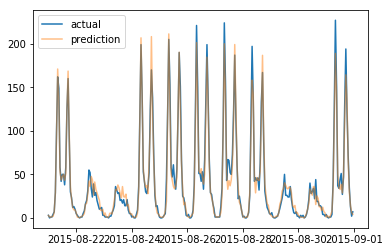

In [239]:
plt.plot(test.current, label='actual')
plt.plot(pred, label='prediction', alpha=0.5)
plt.legend()

In [233]:
deltas = pred - test.current

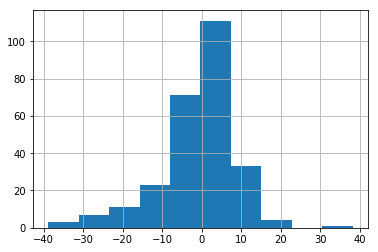

In [234]:
deltas.hist()

In [235]:
mu, sigma = deltas.mean(), deltas.std()

In [236]:
mu

-1.0415467376942662

In [237]:
sigma

9.4720414543627012

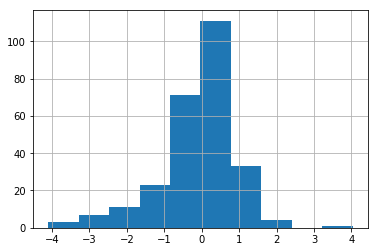

In [240]:
(deltas / sigma).hist()

In [241]:
zs = deltas / sigma

In [242]:
zs[zs.abs() > 3]

Start Date
2015-08-24 17:00:00    4.032922
2015-08-27 11:00:00   -3.600069
2015-08-28 08:00:00   -4.096266
2015-08-30 15:00:00   -3.019412
2015-08-31 08:00:00   -4.022364
2015-08-31 17:00:00   -3.135544
dtype: float64